In [2]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD

In [3]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


5


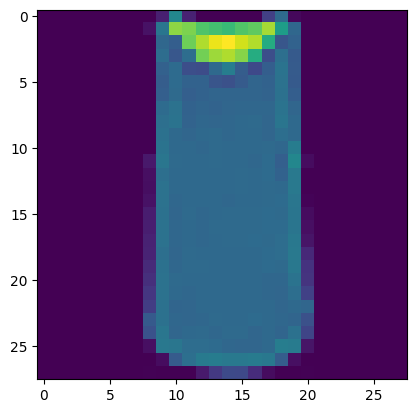

In [4]:
plt.imshow(trainX[2])
print(trainY[1007])

In [5]:
class_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

In [6]:
print("Training: ",trainX.shape)

Training:  (60000, 28, 28)


In [7]:
print("Test: ",testX.shape)

Test:  (10000, 28, 28)


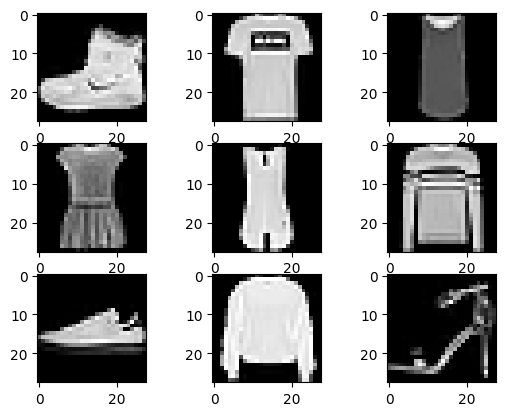

In [8]:
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(trainX[i], cmap='gray')

In [9]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [10]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
trainY=lb.fit_transform(trainY)
testY=lb.transform(testY)
#categorical labels into a binary representation

In [11]:
trainX = trainX/255.0
testX = testX/255.0

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(layers.Dense(10, activation="softmax"))

#compile model

opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.5399 - accuracy: 0.8088 - val_loss: 0.4569 - val_accuracy: 0.8399
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3989 - accuracy: 0.8587 - val_loss: 0.3948 - val_accuracy: 0.8588
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3566 - accuracy: 0.8741 - val_loss: 0.4388 - val_accuracy: 0.8354
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3286 - accuracy: 0.8838 - val_loss: 0.3388 - val_accuracy: 0.8790
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3066 - accuracy: 0.8916 - val_loss: 0.3423 - val_accuracy: 0.8786
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2902 - accuracy: 0.8956 - val_loss: 0.3401 - val_accuracy: 0.8794
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2765 - accuracy: 0.9009 - val_loss: 0.3105 -

In [14]:
test_loss, test_accuracy = model.evaluate(testX, testY)

313/313 [==============================] - 2s 5ms/step - loss: 0.2985 - accuracy: 0.8884


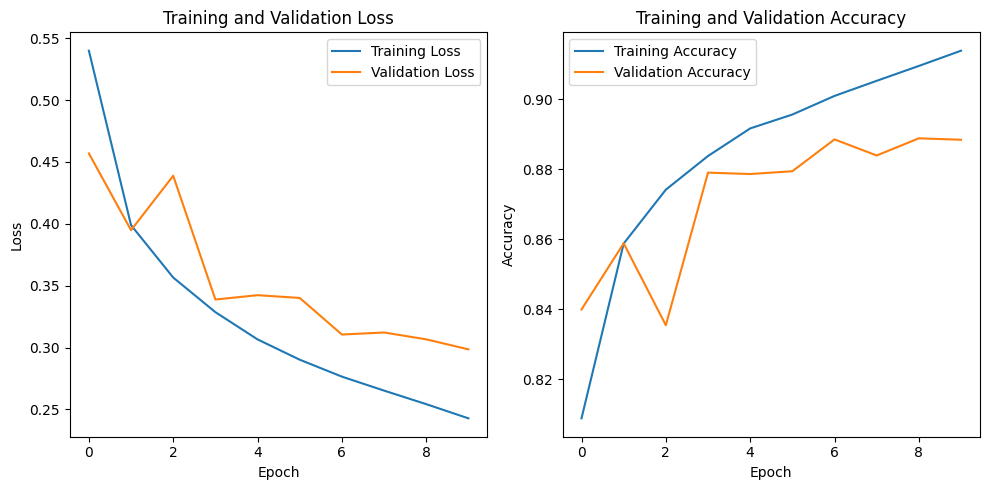

In [15]:
# Extract training history
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Plot training loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image  # Import the Python Imaging Library

# Load and preprocess the new image
img_path = '/content/tshirt.jpeg'  # Replace with the path to your image
img = Image.open(img_path)  # Open the image
img = img.convert('L')  # Convert to grayscale
img = img.resize((28, 28))  # Resize to match the model's input size
img = np.array(img)  # Convert to a NumPy array
img = img.reshape(1, 28, 28)  # Reshape to match the expected input shape

# Normalize pixel values, if needed
img = img / 255.0

# Make predictions
predictions = model.predict(img)

# Decode the predictions if needed (e.g., for classification tasks)
predicted_class = np.argmax(predictions)
predicted_class

1/1 [==============================] - 0s 36ms/step


8